# Brain tumour classification
## By: Meet Ghodke

## <ins> Model Training: <ins>

In [1]:
import numpy as np
import cv2
import pathlib
from PIL import Image
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The above contains built-in Python libraries which would be needed to run aspects of the code.

In [2]:
dataset_path = pathlib.Path("/kaggle/input/brain-tumor-mri-dataset/Training")
dataset_path

PosixPath('/kaggle/input/brain-tumor-mri-dataset/Training')

Using ‘pathlib‘ library gives the user more robust way of accessing folders, files and filenames.

In [3]:
image_list = list (dataset_path.glob('*/*.jpg'))
print(image_list[:3])

[PosixPath('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg'), PosixPath('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg'), PosixPath('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg')]


• `.glob()` is a built-in method that tracks files whose name matches the pattern of .jpg.

• `* / *` is used to indicate to the compiler to look a layer deeper (for the images within the three folders under the train folder).

• A list is created with all the JPG file paths.

• In order to confirm this was successful, the first 3 elements are printed and crosschecked with the file names inside the folder.

In [4]:
total_images = len(image_list)
print(total_images)

5712


• The number of total items (images) present in the list is stored in total images.

• `print(total images)` displays the number of images stored.

In [5]:
glioma = list(dataset_path.glob('glioma/*'))
meningioma = list(dataset_path.glob('meningioma/*'))
notumor = list(dataset_path.glob('notumor/*'))
pituitary = list(dataset_path.glob('pituitary/*'))

• In the above code, the `dataset_path.glob('glioma/*')` indicates in the image file names.

• Afterwards, combine that in a list and store the list in variable `glioma`.

• Use the Pillows library and its function `Image.open()` to view an image from each list.

• Repeat the same with `meningioma`, `notumor` and `pituitary` lists. 

## Example of Glioma image: 

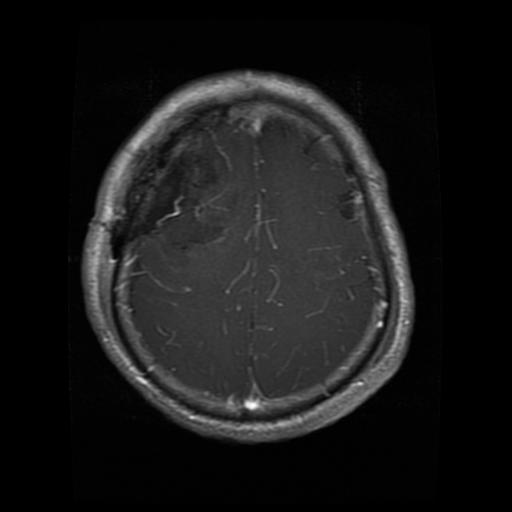

In [6]:
Image.open(glioma[8])

## Example of meningioma image: 

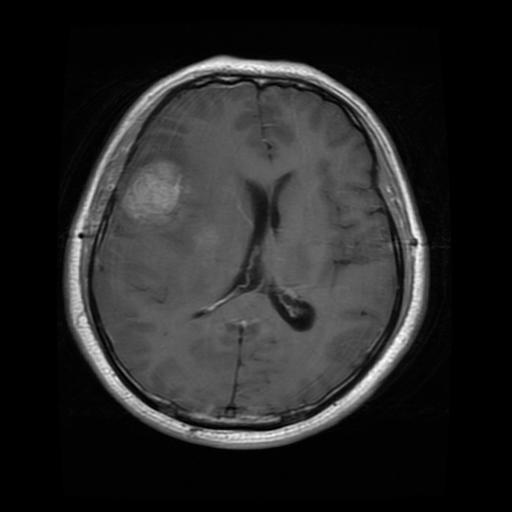

In [7]:
Image.open(meningioma[4])

## Example of notumor image: 

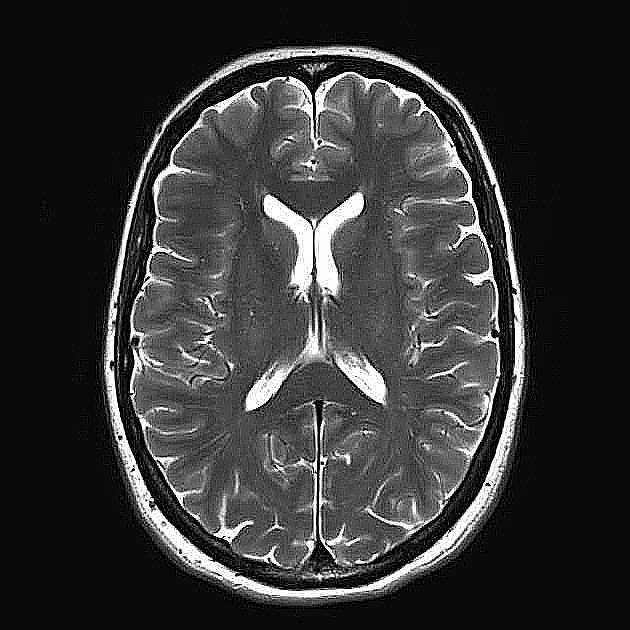

In [8]:
Image.open(notumor[4])

## Example of pituitary image: 


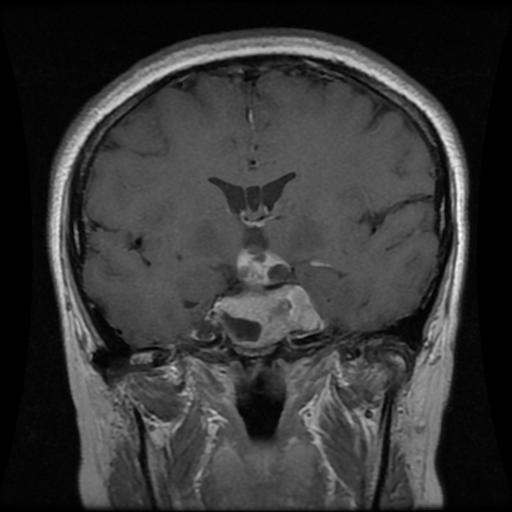

In [9]:
Image.open(pituitary[19])

In [10]:
tumor_images_dict = {
'Glioma': list(dataset_path.glob('glioma/*')),
'Meningioma': list(dataset_path.glob('meningioma/*')),
'No tumor': list(dataset_path.glob('notumor/*')),
'Pituitary': list(dataset_path.glob('pituitary/*'))
}

The above is an elegant way to put the list of the file names of the images into it's appropriate tumor category using a dictionary.

In [11]:
tumor_labels_dict = {
'Glioma': 0,
'Meningioma': 1,
'No tumor': 2,
'Pituitary' : 3
}

In order to create labels for the machine to understand, one cannot create text-like labels; they must be small integer numbers to represent the label.

• 0 indicates it’s a `Glioma`.

• 1 indicates it’s a `Meningioma`.

• 2 indicates it’s a `No tumor`.

• 3 indicates it’s a `Pituitary`.

In [12]:
x , y = [] , []
for tumor_name , images in tumor_images_dict.items():
    for image in images :
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224 ,224))
        x. append(resized_img)
        y. append(tumor_labels_dict[tumor_name])
x = np.array(x)
y = np.array(y)

• Creation of two empty lists.

• `x` will hold resized images.

• `y` will hold its corresponding labels.

• Loop every image file, the image file is loaded into memory, it is given a label and it is resized to a standard dimension (224,224).

• Converting `x` and `y` from python lists to numpy arrays (because they become easier to deal with).

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

The `train_test_split` from SciKi-Learn enables the automated division of the dataset into training and testing phases. (By default as in our code, 75% of data would be randomly trained and 25% would be randomly tested).

In [14]:
x_train_mod = x_train/255
x_test_mod = x_test/255

• Every pixel in the jpg format is in range [0,255].

• Neural Networks learn better when the pixel value of images is between the range [0,1], hence the division by 255 is done.

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
x_train_mod = preprocess_input(x_train.astype(np.float32))
x_test_mod = preprocess_input(x_test.astype(np.float32))

The MobileNetV2 model already possesses the required network layers for the classification of images. It needs pre-processing to be done on the dataset to begin its operation.The pre-processing action is the conversion of uint8 [0-255] image arrays to a floating point number.

In [16]:
category_num = 4

In [17]:
from tensorflow.keras import layers , Sequential
base_model = MobileNetV2 (input_shape =(224 , 224 , 3) ,
    include_top = False , weights = 'imagenet')
base_model.trainable = False
model = Sequential ([
    base_model,
    layers.GlobalAveragePooling2D () ,
    layers.Dense (4, activation ='softmax')
])
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [18]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics =['accuracy']
)
model .fit( x_train_mod , y_train , epochs = 5)

Epoch 1/5
134/134 [==============================] - 9s 35ms/step - loss: 0.5640 - accuracy: 0.7920
Epoch 2/5
134/134 [==============================] - 4s 32ms/step - loss: 0.3049 - accuracy: 0.8982
Epoch 3/5
134/134 [==============================] - 4s 32ms/step - loss: 0.2521 - accuracy: 0.9162
Epoch 4/5
134/134 [==============================] - 4s 32ms/step - loss: 0.2182 - accuracy: 0.9276
Epoch 5/5
134/134 [==============================] - 4s 32ms/step - loss: 0.1956 - accuracy: 0.9325


• In this cell Keras is implemented from TensorFlow and its neural layers, layers and sequential, are called.

• `input shape = (224,224,3)` sets dimensions for the input image to have a length and width of 224 pixels while having an RGB colour palette.

• `base model.trainable = False` freezes all the neural layers except the last output layer, allowing the user to put their classified labels.

• Sequential model is run, in the pooling layer, GlobalAverage is preferred over GlobalMax due to better compatibility with pre-trained MobileNetV2 model.

• From the above, we can observe that the pretrained model has 2,257,984 parameters.

• Final dense layer has 5124.

## <ins> Model Testing: <ins>

In [19]:
testing_path =  pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Testing')
testing_path

PosixPath('/kaggle/input/brain-tumor-mri-dataset/Testing')

In [20]:
tumor_images_dict_test = {
    'Glioma': list(testing_path.glob('glioma/*')),
    'Meningioma': list(testing_path.glob('meningioma/*')),
    'No tumor': list(testing_path.glob('notumor/*')), 
    'Pituitary': list(testing_path.glob('pituitary/*'))
}

Putting the list of the file names of the test images into it's appropriate tumor category using a dictionary.

In [21]:
x_test , y_test = [] , []
for tumor_name , images in tumor_images_dict_test.items(): 
    for image in images: 
        img = cv2.imread(str(image))
        if img is None:
            continue
        resized_img = cv2.resize(img,(224,224))
        x_test.append(resized_img)
        y_test.append(tumor_labels_dict[tumor_name])
x_test = np.array(x_test)
y_test = np.array(y_test)

• Creation of two empty lists `x_test` , `y_test`.

• `x_test` will hold resized testing images.

• `y_test` will hold its corresponding labels.

In [22]:
x_test = preprocess_input(x_test.astype("float32"))

Conversion of uint8 image arrays to a floating point number. 

In [23]:
tumor_test_loss , tumor_test_acc =  model.evaluate(x_test, y_test, verbose=1)
from sklearn.metrics import confusion_matrix , classification_report
y_prob = model.predict(x_test)
y_result = np.argmax(y_prob, axis = 1)
print("Accuracy of testing: ",tumor_test_acc)
print("Loss: ", tumor_test_loss)
print("Confusion matrix: \n", confusion_matrix(y_test , y_result)) 
print("Classification Report:\n", classification_report(y_test, y_result, target_names=['Glioma','Meningioma','No tumor','Pituitary']))


41/41 [==============================] - 2s 30ms/step
Accuracy of testing:  0.8924484848976135
Loss:  0.31154993176460266
Confusion matrix: 
 [[234  64   0   2]
 [  6 256  26  18]
 [  0   4 401   0]
 [  3  18   0 279]]
Classification Report:
               precision    recall  f1-score   support

      Glioma       0.96      0.78      0.86       300
  Meningioma       0.75      0.84      0.79       306
    No tumor       0.94      0.99      0.96       405
   Pituitary       0.93      0.93      0.93       300

    accuracy                           0.89      1311
   macro avg       0.90      0.88      0.89      1311
weighted avg       0.90      0.89      0.89      1311

